In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b450a7de2603a1c53bdc98669175e0ff


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | vaini
Processing Record 2 of Set 13 | hualmay
Processing Record 3 of Set 13 | hobart
Processing Record 4 of Set 13 | ushuaia
Processing Record 5 of Set 13 | disa
Processing Record 6 of Set 13 | jamestown
Processing Record 7 of Set 13 | olafsvik
Processing Record 8 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 13 | lugoba
Processing Record 10 of Set 13 | hithadhoo
Processing Record 11 of Set 13 | san patricio
Processing Record 12 of Set 13 | saint george
Processing Record 13 of Set 13 | tuktoyaktuk
Processing Record 14 of Set 13 | waitati
Processing Record 15 of Set 13 | wenatchee
Processing Record 16 of Set 13 | yellowknife
Processing Record 17 of Set 13 | ravar
Processing Record 18 of Set 13 | tiksi
Processing Record 19 of Set 13 | georgetown
Processing Record 20 of Set 13 | saint-medard-en-jalles
Processing Record 21 of Set 13 | punta arenas
Processing Record 22 of Set 13 | hermanus
Processing Record 23 of Set 13 | buar

Processing Record 36 of Set 16 | gurupi
Processing Record 37 of Set 16 | havre-saint-pierre
Processing Record 38 of Set 16 | dourbali
Processing Record 39 of Set 16 | warrnambool
Processing Record 40 of Set 16 | luceville
City not found. Skipping...
Processing Record 41 of Set 16 | mar del plata
Processing Record 42 of Set 16 | williston
Processing Record 43 of Set 16 | quixada
Processing Record 44 of Set 16 | ponta do sol
Processing Record 45 of Set 16 | kemijarvi
City not found. Skipping...
Processing Record 46 of Set 16 | fomboni
Processing Record 47 of Set 16 | sitka
Processing Record 48 of Set 16 | airai
Processing Record 49 of Set 16 | sept-iles
Processing Record 50 of Set 16 | esmeraldas
Processing Record 1 of Set 17 | marawi
Processing Record 2 of Set 17 | zonguldak
Processing Record 3 of Set 17 | kaitangata
Processing Record 4 of Set 17 | kvareli
Processing Record 5 of Set 17 | lakes entrance
Processing Record 6 of Set 17 | haines junction
Processing Record 7 of Set 17 | harpe

City not found. Skipping...
Processing Record 24 of Set 20 | praia da vitoria
Processing Record 25 of Set 20 | sorvag
City not found. Skipping...
Processing Record 26 of Set 20 | palaikastron
Processing Record 27 of Set 20 | husavik
Processing Record 28 of Set 20 | alihe
Processing Record 29 of Set 20 | kindu
Processing Record 30 of Set 20 | hirara
Processing Record 31 of Set 20 | krasnoselkup
Processing Record 32 of Set 20 | marcona
City not found. Skipping...
Processing Record 33 of Set 20 | vaitape
Processing Record 34 of Set 20 | daru
Processing Record 35 of Set 20 | pastavy
Processing Record 36 of Set 20 | dumai
Processing Record 37 of Set 20 | amderma
City not found. Skipping...
Processing Record 38 of Set 20 | bata
Processing Record 39 of Set 20 | ineu
Processing Record 40 of Set 20 | quelimane
Processing Record 41 of Set 20 | lodja
Processing Record 42 of Set 20 | tura
Processing Record 43 of Set 20 | nikolayevka
Processing Record 44 of Set 20 | talikota
Processing Record 45 of

Processing Record 8 of Set 24 | chabahar
Processing Record 9 of Set 24 | uvira
Processing Record 10 of Set 24 | hibbing
Processing Record 11 of Set 24 | beringovskiy
Processing Record 12 of Set 24 | nguiu
City not found. Skipping...
Processing Record 13 of Set 24 | disna
Processing Record 14 of Set 24 | alyangula
Processing Record 15 of Set 24 | chifeng
Processing Record 16 of Set 24 | gardan diwal
City not found. Skipping...
Processing Record 17 of Set 24 | tukan
Processing Record 18 of Set 24 | ranot
Processing Record 19 of Set 24 | ostrovnoy
Processing Record 20 of Set 24 | mocambique
City not found. Skipping...
Processing Record 21 of Set 24 | puerto colombia
Processing Record 22 of Set 24 | kalmunai
Processing Record 23 of Set 24 | tynda
Processing Record 24 of Set 24 | karaul
City not found. Skipping...
Processing Record 25 of Set 24 | sumbawanga
Processing Record 26 of Set 24 | abu kamal
Processing Record 27 of Set 24 | takoradi
Processing Record 28 of Set 24 | ust-nera
Processi

In [9]:
len(city_data)

580

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.20,-175.20,80.60,83,75,10.29,TO,2020-02-23 08:30:14
1,Hualmay,-11.10,-77.61,71.62,73,99,1.99,PE,2020-02-23 08:30:25
2,Hobart,-42.88,147.33,68.00,68,75,18.34,AU,2020-02-23 08:30:25
3,Ushuaia,-54.80,-68.30,48.20,70,40,25.28,AR,2020-02-23 08:30:25
4,Disa,24.25,72.17,91.06,16,0,6.80,IN,2020-02-23 08:30:25
5,Jamestown,42.10,-79.24,37.00,58,1,5.82,US,2020-02-23 08:28:48
6,Olafsvik,64.89,-23.71,29.98,64,95,30.18,IS,2020-02-23 08:30:26
7,Lugoba,-6.45,38.33,90.61,50,100,8.10,TZ,2020-02-23 08:30:26
8,Hithadhoo,-0.60,73.08,82.92,78,85,15.14,MV,2020-02-23 08:30:26
9,San Patricio,19.22,-104.70,74.55,75,0,3.38,MX,2020-02-23 08:30:27


In [11]:
new_column_order=["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2020-02-23 08:30:14,-21.20,-175.20,80.60,83,75,10.29
1,Hualmay,PE,2020-02-23 08:30:25,-11.10,-77.61,71.62,73,99,1.99
2,Hobart,AU,2020-02-23 08:30:25,-42.88,147.33,68.00,68,75,18.34
3,Ushuaia,AR,2020-02-23 08:30:25,-54.80,-68.30,48.20,70,40,25.28
4,Disa,IN,2020-02-23 08:30:25,24.25,72.17,91.06,16,0,6.80
5,Jamestown,US,2020-02-23 08:28:48,42.10,-79.24,37.00,58,1,5.82
6,Olafsvik,IS,2020-02-23 08:30:26,64.89,-23.71,29.98,64,95,30.18
7,Lugoba,TZ,2020-02-23 08:30:26,-6.45,38.33,90.61,50,100,8.10
8,Hithadhoo,MV,2020-02-23 08:30:26,-0.60,73.08,82.92,78,85,15.14
9,San Patricio,MX,2020-02-23 08:30:27,19.22,-104.70,74.55,75,0,3.38


In [12]:
#Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
#Extract relevant fields from the DataFrame for plotting.
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

In [14]:
#Import time module
import time

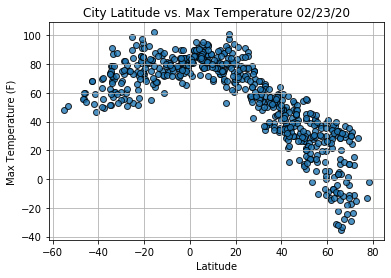

In [15]:
#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

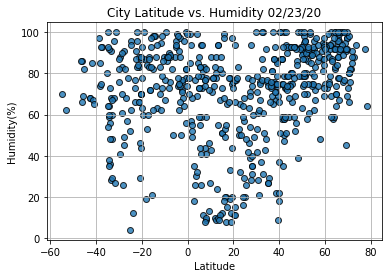

In [16]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

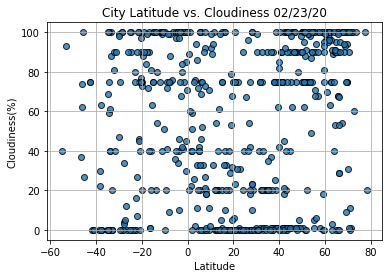

In [17]:
#Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()

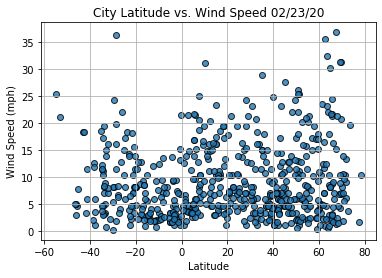

In [18]:
#Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot.
plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [20]:
index13=city_data_df.loc[13]
index13

City                    Wenatchee
Country                        US
Date          2020-02-23 08:30:27
Lat                         47.42
Lng                       -120.31
Max Temp                       41
Humidity                       56
Cloudiness                     75
Wind Speed                   3.36
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Disa,IN,2020-02-23 08:30:25,24.25,72.17,91.06,16,0,6.80
5,Jamestown,US,2020-02-23 08:28:48,42.10,-79.24,37.00,58,1,5.82
6,Olafsvik,IS,2020-02-23 08:30:26,64.89,-23.71,29.98,64,95,30.18
9,San Patricio,MX,2020-02-23 08:30:27,19.22,-104.70,74.55,75,0,3.38
10,Saint George,US,2020-02-23 08:30:27,37.10,-113.58,44.01,100,90,4.70


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

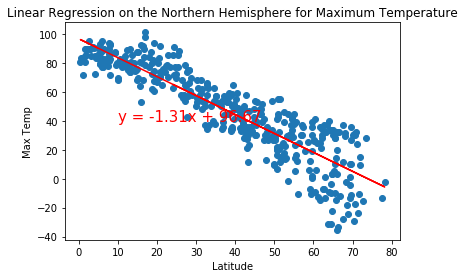

In [23]:
from scipy.stats import linregress
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

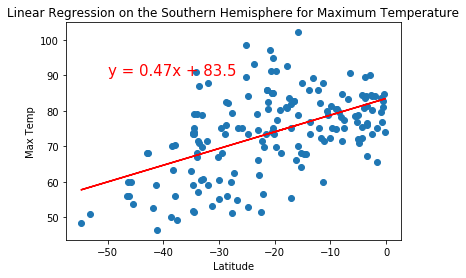

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

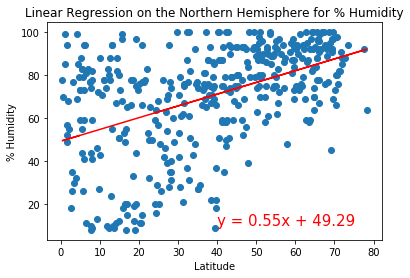

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

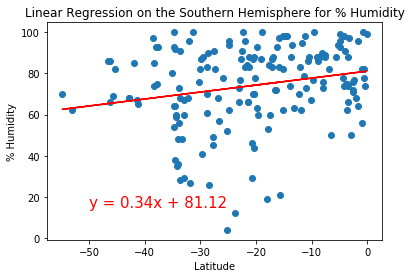

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

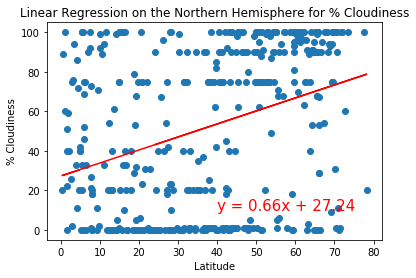

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

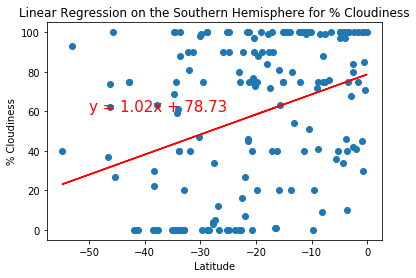

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

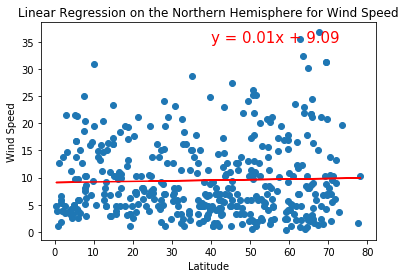

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

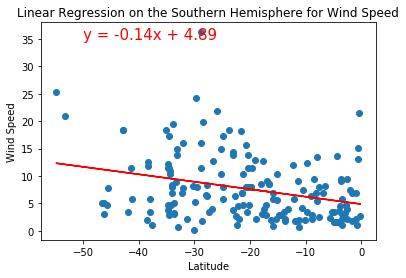

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))